In [153]:
# Import dependencies
import requests
import os
import pprint
from datetime import datetime,timedelta
import json
import pandas as pd
from dateutil.parser import parse
import itertools
from itertools import permutations
import tqdm 
from tqdm import tqdm
import csv


In [154]:
# Set params for query
pax = input(' # of adults will be traveling?')
children = input(' # Children traveling with you?')
p0 = input(' Starting place') 
startdate = input('Trip start date (mm/dd/yyyy)')
destinations = input('List the cities do you want to travel to? And how many days per city? ex(London,4,Madrid,3,Paris,6)')
#destinations.replace(" ", "")
destinations1 = list(destinations.split(','))




 # of adults will be traveling?1
 # Children traveling with you?0
 Starting placemiami
Trip start date (mm/dd/yyyy)12/01/2019
List the cities do you want to travel to? And how many days per city? ex(London,4,Madrid,3,Paris,6)madrid,6,paris,3,tel aviv,5


In [155]:
p1=(str(destinations1[0]),int(destinations1[1]))
p2 = (str(destinations1[2]), int(destinations1[3]))
p3 = (str(destinations1[4]), int(destinations1[5]))


def changeorder(res,p1,p2,p3,startdate,p0,children,pax):
    

    start_date = parse(startdate)
    days_p1=p1[1]
    days_p2=p2[1]
    days_p3=p3[1]
    start_p1 = start_date + timedelta(days=days_p1)
    start_p2 = start_p1 + timedelta(days=days_p2)
    start_p3 = start_p2 + timedelta(days=days_p3)
    url = "https://apidojo-hipmunk-v1.p.rapidapi.com/flights/create-session"

    querystring = {"from1":p1[0],"from2":p2[0],"from3":p3[0],"to1":p2[0],"to2":p3[0],"to3":p0,"date1":start_p1,"date2":start_p2,"date3":start_p3,"infants_lap":"0","children":children,"seniors":"0","country":"US","from0":p0,"to0":p1[0],"date0":startdate,"pax":pax,"cabin":"Coach"}
    headers = {
        'x-rapidapi-host': "apidojo-hipmunk-v1.p.rapidapi.com",
        'x-rapidapi-key': "c36e6ce6fcmsh7fe55ace5e9f40fp10fdc1jsn690a20bbc0ef"
        }

    response = requests.request("GET", url, headers=headers, params=querystring).json()

    #does stuff with response
    idnums=[]
    agonies=[]
    prices=[]
    routingid=[]
    

    for key,value in response['itins'].items():
        idnum=key
        agony=value['agony']
        price=value['price']
        routing_id=value['routing_idens']
        idnums.append(idnum)
        agonies.append(agony)
        prices.append(price)
        routingid.append(routing_id)
    df=pd.DataFrame()
    df['price']=prices
    df['agonies']=agonies
    df['id']=idnums
    df['routing']=routingid
    
    
    
    


    # Print DF with values
    df = df.sort_values(['price','agonies'], ascending=[True,True])
    df = df[:1]

    res.append([(p1,p2,p3),df])



    #p1,p2,p3 = p2,p3,p1
    return res
    
    

In [156]:
alist = []
listA = [p1, p2, p3]
perm = itertools.permutations(listA) 
  
for i in list(perm): 
    alist.append(i)
alist
    
    
    

[(('madrid', 6), ('paris', 3), ('tel aviv', 5)),
 (('madrid', 6), ('tel aviv', 5), ('paris', 3)),
 (('paris', 3), ('madrid', 6), ('tel aviv', 5)),
 (('paris', 3), ('tel aviv', 5), ('madrid', 6)),
 (('tel aviv', 5), ('madrid', 6), ('paris', 3)),
 (('tel aviv', 5), ('paris', 3), ('madrid', 6))]

In [157]:
print('Sorry, this may take a while...')
res=[]
for i in tqdm(alist):
    p1,p2,p3=i[0],i[1],i[2]
    res=changeorder(res,p1,p2,p3,startdate,p0,children,pax)
    
res=[]
for i in tqdm(alist):
    p1,p2,p3=i[0],i[1],i[2]
    res=changeorder(res,p1,p2,p3,startdate,p0,children,pax)    
    
print('Search 100% completed')   
res


  0%|          | 0/6 [00:00<?, ?it/s]

Sorry, this may take a while...



100%|██████████| 6/6 [00:47<00:00,  7.87s/it]

100%|██████████| 6/6 [01:07<00:00, 11.29s/it]

Search 100% completed


[[(('madrid', 6), ('paris', 3), ('tel aviv', 5)),
        price      agonies                                id  \
  1387  879.0  2453.350352  ee537b0132943c9f97c90e4b8653d651   
  
                                                  routing  
  1387  [458dfcf2fb8507a7fc373035c2f493c1, 0351ab680c7...  ],
 [(('madrid', 6), ('tel aviv', 5), ('paris', 3)),
        price      agonies                                id  \
  2505  934.0  2451.391697  b321bad0df5bc791eecaf5dae7f0e625   
  
                                                  routing  
  2505  [458dfcf2fb8507a7fc373035c2f493c1, e167819e424...  ],
 [(('paris', 3), ('madrid', 6), ('tel aviv', 5)),
        price      agonies                                id  \
  2599  937.0  2610.383066  457db576dbc7520601f5de3e06faf269   
  
                                                  routing  
  2599  [75f75c75221f6185973ac7818bead59c, cca07e5af23...  ],
 [(('paris', 3), ('tel aviv', 5), ('madrid', 6)),
         price      agonies              

In [158]:
df1=pd.DataFrame(res[0][1])
df2=pd.DataFrame(res[1][1])
df3=pd.DataFrame(res[2][1])
df4=pd.DataFrame(res[3][1])
df5=pd.DataFrame(res[4][1])
df6=pd.DataFrame(res[5][1])


In [159]:
#Joining all results into a single DF:

#Option 1
first_choice = df1['routing'].astype(str)
df1new = first_choice.str.split(", ",expand=True)
firstchoice_merged = df1.merge(df1new, how='outer', left_index=True, right_index=True)
firstchoice_merged = firstchoice_merged.drop(columns=['routing'])

#Option 2
second_choice = df2['routing'].astype(str)
df2new = second_choice.str.split(", ",expand=True)
secondchoice_merged = df2.merge(df2new, how='outer', left_index=True, right_index=True)
secondchoice_merged = secondchoice_merged.drop(columns=['routing'])

#Option 3
third_choice = df3['routing'].astype(str)
df3new = third_choice.str.split(", ",expand=True)
thirdchoice_merged = df3.merge(df3new, how='outer', left_index=True, right_index=True)
thirdchoice_merged = thirdchoice_merged.drop(columns=['routing'])

#Option 4
fourth_choice = df4['routing'].astype(str)
df4new = fourth_choice.str.split(", ",expand=True)
fourthchoice_merged = df4.merge(df4new, how='outer', left_index=True, right_index=True)
fourthchoice_merged = fourthchoice_merged.drop(columns=['routing'])

#Option 5
fifth_choice = df5['routing'].astype(str)
df5new = fifth_choice.str.split(", ",expand=True)
fifthchoice_merged = df5.merge(df5new, how='outer', left_index=True, right_index=True)
fifthchoice_merged = fifthchoice_merged.drop(columns=['routing'])

#Option 6
sixth_choice = df6['routing'].astype(str)
df6new = sixth_choice.str.split(", ",expand=True)
sixthchoice_merged = df6.merge(df6new, how='outer', left_index=True, right_index=True)
sixthchoice_merged = sixthchoice_merged.drop(columns=['routing'])

bigdata = [firstchoice_merged,secondchoice_merged,thirdchoice_merged,fourthchoice_merged,fifthchoice_merged,sixthchoice_merged]
result = pd.concat(bigdata)
#result_df = result.sort_values(['price','agonies'], ascending=[True,True])

In [160]:
resultuse_df = result.drop(columns=[0,1,2,3])
resultuse_df


,price,agonies,id
1387,879.0,2453.350352,ee537b0132943c9f97c90e4b8653d651
2505,934.0,2451.391697,b321bad0df5bc791eecaf5dae7f0e625
2599,937.0,2610.383066,457db576dbc7520601f5de3e06faf269
3023,1079.0,2773.472319,c299a5e94dd8a1984f3471b0391cf2f3
284,966.0,2362.558312,a37364ef8901cbe2fbf728122a26b32f
212,1009.0,2795.724016,0859205198a272dc147ef1ae73b19476


In [161]:
xlist1=[]
ylist1=[]
xlist2=[]
ylist2=[]
xlist3=[]
ylist3=[]

for x,y,z in alist:
    d1,d2 = x
    xlist1.append(d1)
    ylist1.append(d2)
    d3,d4 = y
    xlist2.append(d3)
    ylist2.append(d4)
    d5,d6 = z
    xlist3.append(d5)
    ylist3.append(d6)
print(xlist1)
print(ylist1)



['madrid', 'madrid', 'paris', 'paris', 'tel aviv', 'tel aviv']
[6, 6, 3, 3, 5, 5]


In [162]:
alist

[(('madrid', 6), ('paris', 3), ('tel aviv', 5)),
 (('madrid', 6), ('tel aviv', 5), ('paris', 3)),
 (('paris', 3), ('madrid', 6), ('tel aviv', 5)),
 (('paris', 3), ('tel aviv', 5), ('madrid', 6)),
 (('tel aviv', 5), ('madrid', 6), ('paris', 3)),
 (('tel aviv', 5), ('paris', 3), ('madrid', 6))]

In [163]:
alist_df = pd.DataFrame(alist)
alist_df
alist_df

,0,1,2
0,"(madrid, 6)","(paris, 3)","(tel aviv, 5)"
1,"(madrid, 6)","(tel aviv, 5)","(paris, 3)"
2,"(paris, 3)","(madrid, 6)","(tel aviv, 5)"
3,"(paris, 3)","(tel aviv, 5)","(madrid, 6)"
4,"(tel aviv, 5)","(madrid, 6)","(paris, 3)"
5,"(tel aviv, 5)","(paris, 3)","(madrid, 6)"


In [164]:
start = parse(startdate)
#start = start_date.strftime("%B %d, %Y")

#Translating the lenght of stay into a date for first stop departure
g=[]
date1=[]
for days1 in ylist1:
    g = start + timedelta(days=days1)
    #g1 = g.strftime("%B %d, %Y")
    date1.append(g)

#Translating the lenght of stay into a date for second stop departure
c=[]
date2=[]
c1=[]
c2=[]
i=[]

for days2 in date1:
    c1.append(days2)

for i in range(6):    
    xi = (c1[i])
    xh = (ylist2[i])
    c2 = xi + timedelta(days=xh)
    date2.append(c2) 
    
#Translating the lenght of stay into a date for third stop departure    
    
c3=[]
date3=[]
c3=[]
c4=[]
i=[]

for days3 in date2:
    c3.append(days3)

for i in range(6):    
    xe = (c3[i])
    xr = (ylist3[i])
    c4 = xe + timedelta(days=xr)
    date3.append(c4)

                               
resultuse_df['Starting_Point'] = p0
resultuse_df['Starting_Date'] = start
resultuse_df['First_Stop'] = xlist1
resultuse_df['Departure_1'] = date1
resultuse_df['Second_Stop'] = xlist2
resultuse_df['Departure_2'] = date2
resultuse_df['Third_Stop'] = xlist3
resultuse_df['Departure_3'] = date3
resultuse_df['End_Point'] = p0
#resultuse_df = resultuse_df.drop[['Starting_Point','Starting_Date']]
df_full = resultuse_df[['price','agonies','Starting_Point','Starting_Date','First_Stop','Departure_1','Second_Stop','Departure_2','Third_Stop','Departure_3','End_Point','id']]

In [165]:
df_fullnew = df_full.rename(columns={"id":'Itinerary_#'})
df_fullnew=df_fullnew.sort_values(['price','agonies'], ascending=[True,True])

In [166]:
df_fullnew

,price,agonies,Starting_Point,Starting_Date,First_Stop,Departure_1,Second_Stop,Departure_2,Third_Stop,Departure_3,End_Point,Itinerary_#
1387,879.0,2453.350352,miami,2019-12-01,madrid,2019-12-07,paris,2019-12-10,tel aviv,2019-12-15,miami,ee537b0132943c9f97c90e4b8653d651
2505,934.0,2451.391697,miami,2019-12-01,madrid,2019-12-07,tel aviv,2019-12-12,paris,2019-12-15,miami,b321bad0df5bc791eecaf5dae7f0e625
2599,937.0,2610.383066,miami,2019-12-01,paris,2019-12-04,madrid,2019-12-10,tel aviv,2019-12-15,miami,457db576dbc7520601f5de3e06faf269
284,966.0,2362.558312,miami,2019-12-01,tel aviv,2019-12-06,madrid,2019-12-12,paris,2019-12-15,miami,a37364ef8901cbe2fbf728122a26b32f
212,1009.0,2795.724016,miami,2019-12-01,tel aviv,2019-12-06,paris,2019-12-09,madrid,2019-12-15,miami,0859205198a272dc147ef1ae73b19476
3023,1079.0,2773.472319,miami,2019-12-01,paris,2019-12-04,tel aviv,2019-12-09,madrid,2019-12-15,miami,c299a5e94dd8a1984f3471b0391cf2f3


In [167]:
destination_df = df_fullnew.loc[:,['Starting_Point','First_Stop','Second_Stop','Third_Stop','End_Point']]
destination_df

,Starting_Point,First_Stop,Second_Stop,Third_Stop,End_Point
1387,miami,madrid,paris,tel aviv,miami
2505,miami,madrid,tel aviv,paris,miami
2599,miami,paris,madrid,tel aviv,miami
284,miami,tel aviv,madrid,paris,miami
212,miami,tel aviv,paris,madrid,miami
3023,miami,paris,tel aviv,madrid,miami


In [168]:
# Create an empty list 
destinations_list =[] 
  
# Iterate over each row 
for index, rows in destination_df.iterrows(): 
    # Create list for the current row 
    my_list =[rows.Starting_Point, rows.First_Stop, rows.Second_Stop, rows.Third_Stop, rows.End_Point] 
      
    # append the list to the final list 
    destinations_list.append(my_list) 
  
# Print the list 
print(destinations_list) 


[['miami', 'madrid', 'paris', 'tel aviv', 'miami'], ['miami', 'madrid', 'tel aviv', 'paris', 'miami'], ['miami', 'paris', 'madrid', 'tel aviv', 'miami'], ['miami', 'tel aviv', 'madrid', 'paris', 'miami'], ['miami', 'tel aviv', 'paris', 'madrid', 'miami'], ['miami', 'paris', 'tel aviv', 'madrid', 'miami']]


In [169]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode)
destination_df['location'] = destination_df['Starting_Point'].apply(geocode)
destination_df['point'] = destination_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
destination_df['location2'] = destination_df['First_Stop'].apply(geocode)
destination_df['point2'] = destination_df['location2'].apply(lambda loc: tuple(loc.point) if loc else None)
destination_df['location3'] = destination_df['Second_Stop'].apply(geocode)
destination_df['point3'] = destination_df['location3'].apply(lambda loc: tuple(loc.point) if loc else None)
destination_df['location4'] = destination_df['Third_Stop'].apply(geocode)
destination_df['point4'] = destination_df['location4'].apply(lambda loc: tuple(loc.point) if loc else None)

In [170]:
destination_df

,Starting_Point,First_Stop,Second_Stop,Third_Stop,End_Point,location,point,location2,point2,location3,point3,location4,point4
1387,miami,madrid,paris,tel aviv,miami,"(Miami, Miami-Dade County, Florida, United Sta...","(25.7742658, -80.1936589, 0.0)","(Madrid, Área metropolitana de Madrid y Corred...","(40.4167047, -3.7035825, 0.0)","(Paris, Île-de-France, France, (48.8566101, 2....","(48.8566101, 2.3514992, 0.0)","(תל אביב-יפו, מחוז תל אביב, ישראל, (32.0804808...","(32.0804808, 34.7805274, 0.0)"
2505,miami,madrid,tel aviv,paris,miami,"(Miami, Miami-Dade County, Florida, United Sta...","(25.7742658, -80.1936589, 0.0)","(Madrid, Área metropolitana de Madrid y Corred...","(40.4167047, -3.7035825, 0.0)","(תל אביב-יפו, מחוז תל אביב, ישראל, (32.0804808...","(32.0804808, 34.7805274, 0.0)","(Paris, Île-de-France, France, (48.8566101, 2....","(48.8566101, 2.3514992, 0.0)"
2599,miami,paris,madrid,tel aviv,miami,"(Miami, Miami-Dade County, Florida, United Sta...","(25.7742658, -80.1936589, 0.0)","(Paris, Île-de-France, France, (48.8566101, 2....","(48.8566101, 2.3514992, 0.0)","(Madrid, Área metropolitana de Madrid y Corred...","(40.4167047, -3.7035825, 0.0)","(תל אביב-יפו, מחוז תל אביב, ישראל, (32.0804808...","(32.0804808, 34.7805274, 0.0)"
284,miami,tel aviv,madrid,paris,miami,"(Miami, Miami-Dade County, Florida, United Sta...","(25.7742658, -80.1936589, 0.0)","(תל אביב-יפו, מחוז תל אביב, ישראל, (32.0804808...","(32.0804808, 34.7805274, 0.0)","(Madrid, Área metropolitana de Madrid y Corred...","(40.4167047, -3.7035825, 0.0)","(Paris, Île-de-France, France, (48.8566101, 2....","(48.8566101, 2.3514992, 0.0)"
212,miami,tel aviv,paris,madrid,miami,"(Miami, Miami-Dade County, Florida, United Sta...","(25.7742658, -80.1936589, 0.0)","(תל אביב-יפו, מחוז תל אביב, ישראל, (32.0804808...","(32.0804808, 34.7805274, 0.0)","(Paris, Île-de-France, France, (48.8566101, 2....","(48.8566101, 2.3514992, 0.0)","(Madrid, Área metropolitana de Madrid y Corred...","(40.4167047, -3.7035825, 0.0)"
3023,miami,paris,tel aviv,madrid,miami,"(Miami, Miami-Dade County, Florida, United Sta...","(25.7742658, -80.1936589, 0.0)","(Paris, Île-de-France, France, (48.8566101, 2....","(48.8566101, 2.3514992, 0.0)","(תל אביב-יפו, מחוז תל אביב, ישראל, (32.0804808...","(32.0804808, 34.7805274, 0.0)","(Madrid, Área metropolitana de Madrid y Corred...","(40.4167047, -3.7035825, 0.0)"


In [171]:
coorddesti_df = destination_df[['point','point2','point3','point4']]
maping_coord = coorddesti_df.iloc[[0]]

# Create an empty list 
Row_list =[] 
  
# Iterate over each row 
for index, rows in maping_coord.iterrows(): 
    # Create list for the current row 
    my_list =[rows.point, rows.point2, rows.point3, rows.point4] 
      
    # append the list to the final list 
    Row_list.append(my_list) 

c, v, z =  zip(*my_list)
print('c =', c)
print('v =', v)

lat0 = c[0]
lat1 = c[1]
lat2 = c[2]
lat3 = c[3]

long0 = v[0]
long1 = v[1]
long2 = v[2]
long3 = v[3]




c = (25.7742658, 40.4167047, 48.8566101, 32.0804808)
v = (-80.1936589, -3.7035825, 2.3514992, 34.7805274)


In [172]:
mergedDf = coorddesti_df.merge(df_fullnew, left_index=True, right_index=True)
mergedDf

,point,point2,point3,point4,price,agonies,Starting_Point,Starting_Date,First_Stop,Departure_1,Second_Stop,Departure_2,Third_Stop,Departure_3,End_Point,Itinerary_#
1387,"(25.7742658, -80.1936589, 0.0)","(40.4167047, -3.7035825, 0.0)","(48.8566101, 2.3514992, 0.0)","(32.0804808, 34.7805274, 0.0)",879.0,2453.350352,miami,2019-12-01,madrid,2019-12-07,paris,2019-12-10,tel aviv,2019-12-15,miami,ee537b0132943c9f97c90e4b8653d651
2505,"(25.7742658, -80.1936589, 0.0)","(40.4167047, -3.7035825, 0.0)","(32.0804808, 34.7805274, 0.0)","(48.8566101, 2.3514992, 0.0)",934.0,2451.391697,miami,2019-12-01,madrid,2019-12-07,tel aviv,2019-12-12,paris,2019-12-15,miami,b321bad0df5bc791eecaf5dae7f0e625
2599,"(25.7742658, -80.1936589, 0.0)","(48.8566101, 2.3514992, 0.0)","(40.4167047, -3.7035825, 0.0)","(32.0804808, 34.7805274, 0.0)",937.0,2610.383066,miami,2019-12-01,paris,2019-12-04,madrid,2019-12-10,tel aviv,2019-12-15,miami,457db576dbc7520601f5de3e06faf269
284,"(25.7742658, -80.1936589, 0.0)","(32.0804808, 34.7805274, 0.0)","(40.4167047, -3.7035825, 0.0)","(48.8566101, 2.3514992, 0.0)",966.0,2362.558312,miami,2019-12-01,tel aviv,2019-12-06,madrid,2019-12-12,paris,2019-12-15,miami,a37364ef8901cbe2fbf728122a26b32f
212,"(25.7742658, -80.1936589, 0.0)","(32.0804808, 34.7805274, 0.0)","(48.8566101, 2.3514992, 0.0)","(40.4167047, -3.7035825, 0.0)",1009.0,2795.724016,miami,2019-12-01,tel aviv,2019-12-06,paris,2019-12-09,madrid,2019-12-15,miami,0859205198a272dc147ef1ae73b19476
3023,"(25.7742658, -80.1936589, 0.0)","(48.8566101, 2.3514992, 0.0)","(32.0804808, 34.7805274, 0.0)","(40.4167047, -3.7035825, 0.0)",1079.0,2773.472319,miami,2019-12-01,paris,2019-12-04,tel aviv,2019-12-09,madrid,2019-12-15,miami,c299a5e94dd8a1984f3471b0391cf2f3


In [173]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    
    marker = {'size': 5}))

fig.add_trace(go.Scattermapbox(
mode = "markers+lines",
lon = [long0, long1,long2,long3,long0],
lat = [lat0, lat1, lat2,lat3,lat0],
marker = {'size': 5}))

fig.update_layout(
    margin ={'l':0,'t':0,'b':0,'r':0},
    mapbox = {
        'center': {'lon': 10, 'lat': 10},
        'style': "stamen-terrain",
        'center': {'lon': -20, 'lat': -20},
        'zoom': 1})
fig.show()

In [174]:
fig = go.Figure(data=go.Scattergeo(
    lat = [lat0, lat1, lat2,lat3,lat0],
    lon = [long0, long1,long2,long3,long0],
    mode = 'lines',
    line = dict(width = 2, color = 'green'),
))

fig.update_layout(
    title_text = str(destinations_list[0]),
    showlegend = True,
    geo = dict(
        resolution = 110,
        showland = True,
        showlakes = True,
        landcolor = 'rgb(204, 204, 204)',
        countrycolor = 'blue',
        lakecolor = 'rgb(255, 255, 255)',
        projection_type = "equirectangular",
        coastlinewidth = 2,
        lataxis = dict(
            range = [20, 60],
            showgrid = False,
            dtick = 10
        ),
        lonaxis = dict(
            range = [-100, 20],
            showgrid = True,
            dtick = 20
        ),
    )
)

fig.show()

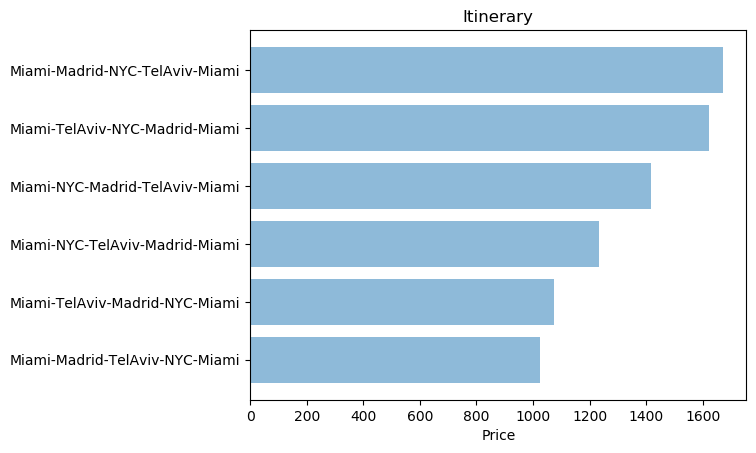

In [175]:
df_fullnew.loc[:,['price','Starting_Point','First_Stop','Second_Stop','Third_Stop','End_Point']]

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Miami-Madrid-TelAviv-NYC-Miami', 'Miami-TelAviv-Madrid-NYC-Miami', 'Miami-NYC-TelAviv-Madrid-Miami', 'Miami-NYC-Madrid-TelAviv-Miami', 'Miami-TelAviv-NYC-Madrid-Miami','Miami-Madrid-NYC-TelAviv-Miami')
y_pos = np.arange(len(objects))
performance = [1026,1074,1232,1417,1623,1671]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Price')
plt.title('Itinerary')

plt.show()

In [176]:
from geopy.distance import great_circle 
# Loading the lat-long data for Itineraries 
Miami = (25.7742658, -80.1936589)
Madrid = (40.4167047, -3.7035825)
NYC = (40.7127281, -74.0060152)
TelAviv = (32.0804808, 34.7805274)

  
# Print the distance calculated in km 
miles_1 = (great_circle(Miami,Madrid,NYC,TelAviv,Miami).miles)
miles_2 = (great_circle(Miami,TelAviv,NYC,Madrid,Miami).miles)
miles_3 = (great_circle(Miami,NYC,Madrid,TelAviv,Miami).miles)
miles_4 = (great_circle(Miami,NYC,TelAviv,Madrid,Miami).miles)
miles_5 = (great_circle(Miami,TelAviv,Madrid,NYC,Miami).miles)
miles_6 = (great_circle(Miami,Madrid,TelAviv,NYC,Miami).miles)




In [177]:
#Conclusions:
print('Miami,Madrid,NYC,TelAviv,Miami is 1671$ and the total miles of this trip are', miles_1)
print('Miami,TelAviv,NYC,Madrid,Miami is 1623$ and the total miles of this trip are', miles_2)
print('Miami,NYC,Madrid,TelAviv,Miami is 1417$ and the total miles of this trip are', miles_3)
print('Miami,NYC,TelAviv,Madrid,Miami is 1232$ and the total miles of this trip are', miles_4)
print('Miami,TelAviv,Madrid,NYC,Miami is 1074$ and the total miles of this trip are', miles_5)
print('Miami,Madrid,TelAviv,NYC,Miami is 1026$ and the total miles of this trip are', miles_6)
print('------------------------')
print('In this scenario, there is a direct correlation between miles traveled and the price of the travel itinerary')


Miami,Madrid,NYC,TelAviv,Miami is 1671$ and the total miles of this trip are 20233.666704376206
Miami,TelAviv,NYC,Madrid,Miami is 1623$ and the total miles of this trip are 20233.666704376203
Miami,NYC,Madrid,TelAviv,Miami is 1417$ and the total miles of this trip are 13457.189065208026
Miami,NYC,TelAviv,Madrid,Miami is 1232$ and the total miles of this trip are 13362.701267468809
Miami,TelAviv,Madrid,NYC,Miami is 1074$ and the total miles of this trip are 13457.189065208026
Miami,Madrid,TelAviv,NYC,Miami is 1026$ and the total miles of this trip are 13362.701267468809
------------------------
In this scenario, there is a direct correlation between miles traveled and the price of the travel itinerary
